In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
sns.set()

# 时间序列自动提取库函数
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')


In [7]:
download_robot_execution_failures()
df, y = load_robot_execution_failures()
df.head()

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0


In [10]:
df = df.rename(columns={'F_x':'a',
                   'F_y':'b',
                   'F_z':'c',
                   'T_x':'d',
                   'T_y':'e',
                   'T_z':'f'})
df.head()

,id,time,a,b,c,d,e,f
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0


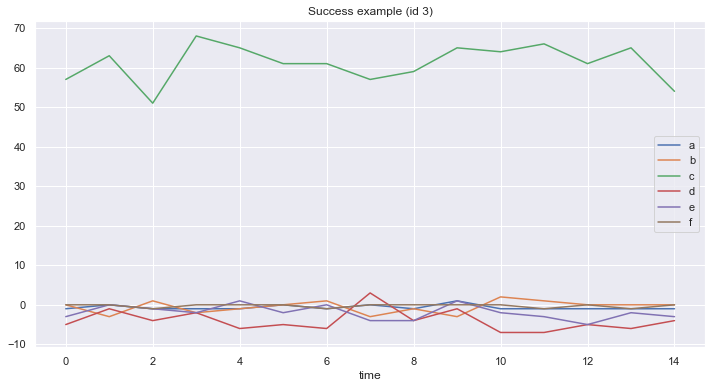

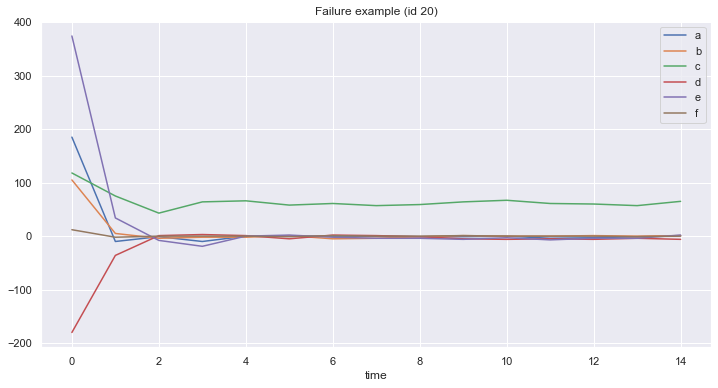

In [11]:
df[df.id == 3][['time', 'a', 'b', 'c', 'd', 'e', 'f']].plot(x='time', title='Success example (id 3)', figsize=(12, 6));
df[df.id == 20][['time', 'a', 'b', 'c', 'd', 'e', 'f']].plot(x='time', title='Failure example (id 20)', figsize=(12, 6));

In [12]:
extraction_settings = ComprehensiveFCParameters()

In [13]:
#column_id (str) – The name of the id column to group by
#column_sort (str) – The name of the sort column.
X = extract_features(df, 
                     column_id='id', column_sort='time',
                     default_fc_parameters=extraction_settings,
                     impute_function= impute)

Feature Extraction: 100%|██████████████████████| 20/20 [00:25<00:00,  1.36it/s]
 'a__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'a__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"' ...
 'f__fft_coefficient__coeff_9__attr_"imag"'
 'f__fft_coefficient__coeff_9__attr_"real"'
 'f__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


In [14]:
X.head()

variable,a__abs_energy,a__absolute_sum_of_changes,"a__agg_autocorrelation__f_agg_""mean""__maxlag_40","a__agg_autocorrelation__f_agg_""median""__maxlag_40","a__agg_autocorrelation__f_agg_""var""__maxlag_40","a__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","a__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","a__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","a__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","a__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,f__symmetry_looking__r_0.9,f__symmetry_looking__r_0.9500000000000001,f__time_reversal_asymmetry_statistic__lag_1,f__time_reversal_asymmetry_statistic__lag_2,f__time_reversal_asymmetry_statistic__lag_3,f__value_count__value_-1,f__value_count__value_0,f__value_count__value_1,f__variance,f__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
1,14.0,2.0,-0.106351,-7.206633e-02,0.016879,0.0,-1.0,-1.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,15.0,0.0,0.000000,0.0
2,25.0,14.0,-0.039098,-4.935275e-02,0.088790,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.000000,0.000000,0.000000,4.0,11.0,0.0,0.195556,0.0
3,12.0,10.0,-0.029815,2.602085e-17,0.105435,1.0,-1.0,-2.0,0.0,0.0,...,1.0,1.0,0.000000,-0.090909,0.000000,4.0,11.0,0.0,0.195556,0.0
4,16.0,17.0,-0.049773,-6.417112e-02,0.143580,1.0,-1.0,-1.0,0.0,0.0,...,1.0,1.0,0.000000,-0.181818,0.000000,6.0,8.0,1.0,0.355556,0.0
5,17.0,13.0,-0.061467,-5.172414e-02,0.052642,2.0,-1.0,-2.0,0.0,0.0,...,1.0,1.0,-0.076923,-0.090909,-0.222222,4.0,9.0,2.0,0.382222,0.0


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 1 to 88
Columns: 4764 entries, a__abs_energy to f__variance_larger_than_standard_deviation
dtypes: float64(4764)
memory usage: 3.2 MB


In [16]:
X_filtered = extract_relevant_features(df, y, 
                                       column_id='id', column_sort='time', 
                                       default_fc_parameters=extraction_settings)

Feature Extraction: 100%|██████████████████████| 20/20 [00:26<00:00,  1.35it/s]
 'a__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'a__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"' ...
 'f__fft_coefficient__coeff_9__attr_"imag"'
 'f__fft_coefficient__coeff_9__attr_"real"'
 'f__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


In [24]:
X_filtered.tail()

variable,a__value_count__value_-1,a__abs_energy,a__range_count__max_1__min_-1,b__abs_energy,e__standard_deviation,e__variance,"a__fft_coefficient__coeff_1__attr_""abs""","e__fft_coefficient__coeff_1__attr_""abs""",e__abs_energy,c__standard_deviation,...,e__number_cwt_peaks__n_1,"d__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","c__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8",d__quantile__q_0.1,b__has_duplicate_max,"b__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_14__w_5","b__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_13__w_2",e__quantile__q_0.1,c__time_reversal_asymmetry_statistic__lag_1,a__quantile__q_0.2
id,,,,,,,,,,,,,,,,,,,,,
84,0.0,96833.0,0.0,42780.0,39.541483,1563.528889,359.248162,309.190088,171261.0,291.988082,...,2.0,64.000000,46.0,203.2,0.0,71.641254,38.559593,36.4,-7.700628e+07,-105.0
85,0.0,1683.0,0.0,1523.0,3.841296,14.755556,36.770027,26.631007,503.0,14.501494,...,3.0,4.666667,4.5,-41.6,0.0,16.349699,14.429645,1.0,-1.050785e+04,5.8
86,0.0,83497.0,0.0,21064.0,52.807154,2788.595556,312.044052,429.697740,118013.0,121.420189,...,3.0,0.250000,7.0,-84.8,0.0,71.095480,60.760842,19.6,-5.544922e+06,30.4
87,0.0,1405437.0,0.0,308658.0,80.098162,6415.715556,481.046930,683.196535,2430295.0,204.966621,...,3.0,0.000000,90.5,-139.2,0.0,173.699573,109.029954,272.6,-9.881845e+07,246.8
88,0.0,1427.0,0.0,113.0,2.628054,6.906667,15.524355,16.768541,7630.0,10.627010,...,3.0,4.666667,0.0,-24.6,0.0,3.226801,2.455593,-26.2,-1.340477e+04,-11.2


In [18]:
X_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 1 to 88
Columns: 619 entries, a__value_count__value_-1 to a__quantile__q_0.2
dtypes: float64(619)
memory usage: 426.2 KB


In [19]:
X_train, X_test, X_filtered_train, X_filtered_test, y_train, y_test = train_test_split(X, X_filtered, y, test_size=.4)

In [20]:
cl = DecisionTreeClassifier()
cl.fit(X_train, y_train)
print(classification_report(y_test, cl.predict(X_test)))

              precision    recall  f1-score   support

       False       1.00      0.97      0.98        30
        True       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.93      0.98      0.95        36
weighted avg       0.98      0.97      0.97        36



In [21]:
cl.n_features_

4764

In [22]:
cl2 = DecisionTreeClassifier()
cl2.fit(X_filtered_train, y_train)
print(classification_report(y_test, cl2.predict(X_filtered_test)))

              precision    recall  f1-score   support

       False       1.00      0.93      0.97        30
        True       0.75      1.00      0.86         6

    accuracy                           0.94        36
   macro avg       0.88      0.97      0.91        36
weighted avg       0.96      0.94      0.95        36



In [23]:
cl2.n_features_

619